In [33]:
#LSTM model made with weather data 
#this version predicts the temperature as a function of the other variables. Predict1.pynb will incorporate PS data as well

    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/aa/Desktop/Astir/weather data/catania 2023-03-01 to 2023-04-03.csv', index_col = 'datetime', parse_dates=True)

In [6]:
df.head()


,name,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,snowdepth,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
datetime,,,,,,,,,,,,,,,,,,,,,
2023-03-01 00:00:00,catania,11.0,11.0,11.0,100.00,0.0,0,NaN,0,0,...,1012.4,15.3,6.8,NaN,NaN,NaN,NaN,Clear,clear-night,"LICZ,16460099999,16459099999,LICC"
2023-03-01 01:00:00,catania,10.5,10.5,10.5,100.00,0.0,0,NaN,0,0,...,1012.9,0.0,8.9,NaN,NaN,NaN,NaN,Clear,clear-night,"LICZ,16460099999,16459099999,LICC"
2023-03-01 02:00:00,catania,11.8,11.8,10.4,91.21,0.0,0,NaN,0,0,...,1012.0,49.5,10.0,NaN,NaN,NaN,NaN,Partially cloudy,partly-cloudy-night,"LICZ,16460099999,16459099999,LICC"
2023-03-01 03:00:00,catania,10.4,10.4,9.0,91.00,0.0,0,NaN,0,0,...,1012.0,90.9,10.0,NaN,NaN,NaN,NaN,Overcast,cloudy,"LICZ,16460099999,16459099999,LICC"
2023-03-01 04:00:00,catania,8.5,6.2,7.5,93.87,0.0,0,NaN,0,0,...,1012.0,99.5,10.0,NaN,NaN,NaN,NaN,Overcast,cloudy,"LICZ,16460099999,16459099999,LICC"


In [14]:
df.keys()

Index(['name', 'temp', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'preciptype', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
       'solarenergy', 'uvindex', 'severerisk', 'conditions', 'icon',
       'stations'],
      dtype='object')

In [34]:
#drop columns that aren't useful
df.drop(['name', 'icon', 'stations'], axis=1, inplace=True)
df.head()

,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions
datetime,,,,,,,,,,,,,,,,,,,,
2023-03-01 00:00:00,11.0,11.0,11.0,100.00,0.0,0,NaN,0,0,19.1,6.4,260.0,1012.4,15.3,6.8,NaN,NaN,NaN,NaN,Clear
2023-03-01 01:00:00,10.5,10.5,10.5,100.00,0.0,0,NaN,0,0,15.5,13.8,255.0,1012.9,0.0,8.9,NaN,NaN,NaN,NaN,Clear
2023-03-01 02:00:00,11.8,11.8,10.4,91.21,0.0,0,NaN,0,0,16.6,17.4,250.0,1012.0,49.5,10.0,NaN,NaN,NaN,NaN,Partially cloudy
2023-03-01 03:00:00,10.4,10.4,9.0,91.00,0.0,0,NaN,0,0,16.9,13.0,240.0,1012.0,90.9,10.0,NaN,NaN,NaN,NaN,Overcast
2023-03-01 04:00:00,8.5,6.2,7.5,93.87,0.0,0,NaN,0,0,17.6,13.9,235.0,1012.0,99.5,10.0,NaN,NaN,NaN,NaN,Overcast


In [35]:
df_conditions = pd.get_dummies(df['conditions'])
df.drop(['conditions'], axis=1, inplace=True)
df_new = pd.concat([df, df_conditions], axis=1)

df_precip = pd.get_dummies(df_new['preciptype'])
df_new.drop(['preciptype'], axis=1, inplace=True)
df_new = pd.concat([df_new, df_precip], axis=1)

df_new.head()

,temp,feelslike,dew,humidity,precip,precipprob,snow,snowdepth,windgust,windspeed,...,visibility,solarradiation,solarenergy,uvindex,severerisk,Clear,Overcast,Partially cloudy,"Rain, Partially cloudy",rain
datetime,,,,,,,,,,,,,,,,,,,,,
2023-03-01 00:00:00,11.0,11.0,11.0,100.00,0.0,0,0,0,19.1,6.4,...,6.8,NaN,NaN,NaN,NaN,1,0,0,0,0
2023-03-01 01:00:00,10.5,10.5,10.5,100.00,0.0,0,0,0,15.5,13.8,...,8.9,NaN,NaN,NaN,NaN,1,0,0,0,0
2023-03-01 02:00:00,11.8,11.8,10.4,91.21,0.0,0,0,0,16.6,17.4,...,10.0,NaN,NaN,NaN,NaN,0,0,1,0,0
2023-03-01 03:00:00,10.4,10.4,9.0,91.00,0.0,0,0,0,16.9,13.0,...,10.0,NaN,NaN,NaN,NaN,0,1,0,0,0
2023-03-01 04:00:00,8.5,6.2,7.5,93.87,0.0,0,0,0,17.6,13.9,...,10.0,NaN,NaN,NaN,NaN,0,1,0,0,0


In [36]:
#replace all nan values with 0
df_new.fillna(0, inplace=True)
df_new.head()

,temp,feelslike,dew,humidity,precip,precipprob,snow,snowdepth,windgust,windspeed,...,visibility,solarradiation,solarenergy,uvindex,severerisk,Clear,Overcast,Partially cloudy,"Rain, Partially cloudy",rain
datetime,,,,,,,,,,,,,,,,,,,,,
2023-03-01 00:00:00,11.0,11.0,11.0,100.00,0.0,0,0,0,19.1,6.4,...,6.8,0.0,0.0,0.0,0.0,1,0,0,0,0
2023-03-01 01:00:00,10.5,10.5,10.5,100.00,0.0,0,0,0,15.5,13.8,...,8.9,0.0,0.0,0.0,0.0,1,0,0,0,0
2023-03-01 02:00:00,11.8,11.8,10.4,91.21,0.0,0,0,0,16.6,17.4,...,10.0,0.0,0.0,0.0,0.0,0,0,1,0,0
2023-03-01 03:00:00,10.4,10.4,9.0,91.00,0.0,0,0,0,16.9,13.0,...,10.0,0.0,0.0,0.0,0.0,0,1,0,0,0
2023-03-01 04:00:00,8.5,6.2,7.5,93.87,0.0,0,0,0,17.6,13.9,...,10.0,0.0,0.0,0.0,0.0,0,1,0,0,0


<AxesSubplot:title={'center':'Catania Weather Data'}, xlabel='datetime'>

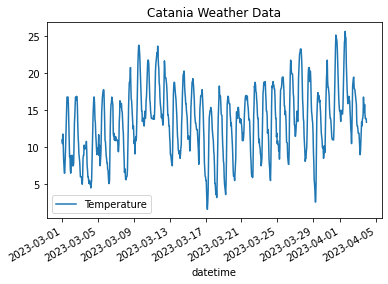

In [37]:
df_new['temp'].plot(label='Temperature', title='Catania Weather Data', legend=True)

In [51]:
# make variable x = all columns of df except first column  
X = df_new.iloc[:, 1:] #everything except first column
y = df_new.iloc[:, 0:1] #select response variable

# give dimension of X and y
print(X.iloc[0:5, 15:])

                     uvindex  severerisk  Clear  Overcast  Partially cloudy  \
datetime                                                                      
2023-03-01 00:00:00      0.0         0.0      1         0                 0   
2023-03-01 01:00:00      0.0         0.0      1         0                 0   
2023-03-01 02:00:00      0.0         0.0      0         0                 1   
2023-03-01 03:00:00      0.0         0.0      0         1                 0   
2023-03-01 04:00:00      0.0         0.0      0         1                 0   

                     Rain, Partially cloudy  rain  
datetime                                           
2023-03-01 00:00:00                       0     0  
2023-03-01 01:00:00                       0     0  
2023-03-01 02:00:00                       0     0  
2023-03-01 03:00:00                       0     0  
2023-03-01 04:00:00                       0     0  


In [52]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler
mm = MinMaxScaler()
ss = StandardScaler()


X_ss = ss.fit_transform(X)
y_mm = mm.fit_transform(y) 

#first 600 for training

X_train = X_ss[:600, :]
X_test = X_ss[600:, :]

y_train = y_mm[:600, :]
y_test = y_mm[600:, :] 

print("Training Shape", X_train.shape, y_train.shape)
print("Testing Shape", X_test.shape, y_test.shape) 

Training Shape (600, 22) (600, 1)
Testing Shape (215, 22) (215, 1)


In [53]:
import torch #pytorch
import torch.nn as nn
from torch.autograd import Variable 

X_train_tensors = Variable(torch.Tensor(X_train))
X_test_tensors = Variable(torch.Tensor(X_test))

y_train_tensors = Variable(torch.Tensor(y_train))
y_test_tensors = Variable(torch.Tensor(y_test)) 

#reshaping to rows, timestamps, features

X_train_tensors_final = torch.reshape(X_train_tensors,   (X_train_tensors.shape[0], 1, X_train_tensors.shape[1]))


X_test_tensors_final = torch.reshape(X_test_tensors,  (X_test_tensors.shape[0], 1, X_test_tensors.shape[1])) 

print("Training Shape", X_train_tensors_final.shape, y_train_tensors.shape)
print("Testing Shape", X_test_tensors_final.shape, y_test_tensors.shape) 

Training Shape torch.Size([600, 1, 22]) torch.Size([600, 1])
Testing Shape torch.Size([215, 1, 22]) torch.Size([215, 1])


In [43]:
class LSTM1(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(LSTM1, self).__init__()
        self.num_classes = num_classes #number of classes
        self.num_layers = num_layers #number of layers
        self.input_size = input_size #input size
        self.hidden_size = hidden_size #hidden state
        self.seq_length = seq_length #sequence length

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                          num_layers=num_layers, batch_first=True) #lstm
        self.fc_1 =  nn.Linear(hidden_size, 128) #fully connected 1
        self.fc = nn.Linear(128, num_classes) #fully connected last layer

        self.relu = nn.ReLU()
    
    def forward(self,x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #hidden state
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #internal state
        # Propagate input through LSTM
        output, (hn, cn) = self.lstm(x, (h_0, c_0)) #lstm with input, hidden, and internal state
        hn = hn.view(-1, self.hidden_size) #reshaping the data for Dense layer next
        out = self.relu(hn)
        out = self.fc_1(out) #first Dense
        out = self.relu(out) #relu
        out = self.fc(out) #Final Output
        return out

In [54]:
num_epochs = 1000 #1000 epochs
learning_rate = 0.001 #0.001 lr

input_size = 22 #number of features
hidden_size = 5 #number of features in hidden state
num_layers = 1 #number of stacked lstm layers

num_classes = 1 #number of output classes 

In [55]:
lstm1 = LSTM1(num_classes, input_size, hidden_size, num_layers, X_train_tensors_final.shape[1]) #our lstm class 

criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm1.parameters(), lr=learning_rate) 

for epoch in range(num_epochs):
  outputs = lstm1.forward(X_train_tensors_final) #forward pass
  optimizer.zero_grad() #caluclate the gradient, manually setting to 0
 
  # obtain the loss function
  loss = criterion(outputs, y_train_tensors)
 
  loss.backward() #calculates the loss of the loss function
 
  optimizer.step() #improve from loss, i.e backprop
  if epoch % 100 == 0:
    print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))



Epoch: 0, loss: 0.24646
Epoch: 100, loss: 0.01053
Epoch: 200, loss: 0.00274
Epoch: 300, loss: 0.00127
Epoch: 400, loss: 0.00077
Epoch: 500, loss: 0.00046
Epoch: 600, loss: 0.00030
Epoch: 700, loss: 0.00022
Epoch: 800, loss: 0.00017
Epoch: 900, loss: 0.00015


In [56]:
df_X_ss = ss.transform(df_new.iloc[:, 1:]) #old transformers
df_y_mm = mm.transform(df_new.iloc[:, 0:1]) #old transformers

df_X_ss = Variable(torch.Tensor(df_X_ss)) #converting to Tensors
df_y_mm = Variable(torch.Tensor(df_y_mm))
#reshaping the dataset
df_X_ss = torch.reshape(df_X_ss, (df_X_ss.shape[0], 1, df_X_ss.shape[1])) 

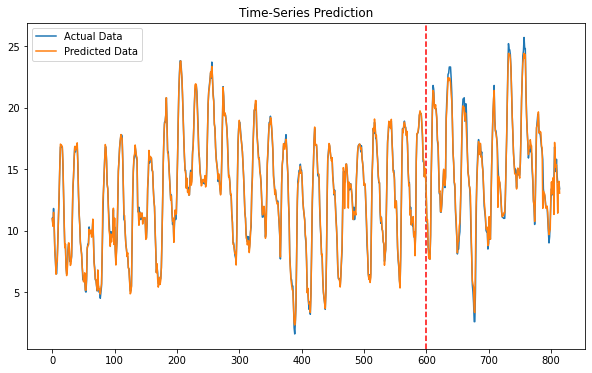

In [58]:


train_predict = lstm1(df_X_ss)#forward pass
data_predict = train_predict.data.numpy() #numpy conversion
dataY_plot = df_y_mm.data.numpy()

data_predict = mm.inverse_transform(data_predict) #reverse transformation
dataY_plot = mm.inverse_transform(dataY_plot)
plt.figure(figsize=(10,6)) #plotting
plt.axvline(x=600, c='r', linestyle='--') #size of the training set

plt.plot(dataY_plot, label='Actual Data') #actual plot
plt.plot(data_predict, label='Predicted Data') #predicted plot
plt.title('Time-Series Prediction')
plt.legend()
plt.show() 

In [59]:
print (df_X_ss)

tensor([[[-0.3857,  1.1141,  1.6006,  ..., -1.6758, -0.1460, -0.1460]],

        [[-0.4797,  0.9442,  1.6006,  ..., -1.6758, -0.1460, -0.1460]],

        [[-0.2352,  0.9103,  1.1165,  ...,  0.5967, -0.1460, -0.1460]],

        ...,

        [[ 0.1599,  0.1969, -0.1113,  ...,  0.5967, -0.1460, -0.1460]],

        [[ 0.1599,  0.0610, -0.1933,  ...,  0.5967, -0.1460, -0.1460]],

        [[ 0.0659, -0.1428, -0.2286,  ...,  0.5967, -0.1460, -0.1460]]])
